Collecte de données :

In [ ]:
import numpy as np
import pandas as pd

urlX = (
       "Parcoursup 2021.anonyme.csv",
       "Parcoursup 2022.anonyme.csv"
       )
urlY= (
       "Semestre 1 2021-2022.anonyme.csv",
       "Semestre 1 2022-2023.anonyme.csv"
)
df1 = pd.read_csv(urlX[0],delimiter="\t")
df2 = pd.read_csv(urlX[1],delimiter="\t")

y1 = pd.read_csv(urlY[0],delimiter=";")
y2 = pd.read_csv(urlY[1],delimiter="\t")

df2.drop(range(0,10), inplace=True) #supprimer les colonnes relatives aux coefficients
df1.drop(range(0,11), inplace=True) #supprimer les colonnes relatives aux coefficients

On supprime les lignes duppliquées :

In [65]:
df2.drop_duplicates(inplace=True) #supprimer les lignes dupliquées
df1.drop_duplicates(inplace=True) #supprimer les lignes dupliquées

On prend que les colonnes communes aux deux années :


In [66]:
common_features =  list(set(df1.columns) & set(df2.columns))
X = pd.concat([df2[common_features],df1[common_features]])
X

,Cordée de la réussite,Moyenne classe en Mathématiques Trimestre 1,Moyenne classe en Sciences de l'ingénieur et sciences physiques Trimestre 1.1,Moyenne candidat en Physique Trimestre 2.1,Note à l'épreuve de Enseignement scientifique (épreuve anticipée),Type de saisie en Mathématiques Expertes Trimestre 3,Moyenne classe en Sciences de l'ingénieur Trimestre 3,Moyenne candidat en Mathématiques Trimestre 3,Type de formation.3,Moyenne candidat en Numérique et Sciences Informatiques Trimestre 3.1,...,Type de saisie en Numérique et Sciences Informatiques Trimestre 1.1,Moyenne candidat en Mathématiques Complémentaires Trimestre 2,Type de saisie en Langue vivante A Trimestre 2.1,"Moyenne classe en Mathématiques, Sciences Physiques Trimestre 1",Moyenne classe en Mathématiques Spécialité Trimestre 3,Type de formation,Type de saisie en Français Trimestre 1.1,Série,Note à l'épreuve de Oral de Français (épreuve anticipée),Autonomie
10,Oui,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Autre formation du secondaire,NaN,...,NaN,NaN,ETA,NaN,NaN,Terminale,ETA,Série Générale,NaN,Très satisfaisante
11,NaN,NaN,NaN,NaN,NaN,CAN,NaN,NaN,Seconde,NaN,...,ETA,NaN,ETA,NaN,"11,26",CPGE,ETA,Série Générale,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Autre formation du secondaire,NaN,...,NaN,NaN,ETA,NaN,NaN,Terminale,ETA,Série Générale,NaN,Très satisfaisante
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Autre formation du secondaire,NaN,...,NaN,NaN,ETA,NaN,NaN,Terminale,ETA,Série Générale,NaN,Très satisfaisante
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Autre formation du secondaire,NaN,...,NaN,NaN,ETA,NaN,NaN,Terminale,ETA,Série Générale,NaN,Très satisfaisante
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Autre formation du secondaire,NaN,...,ETA,NaN,ETA,NaN,NaN,Terminale,ETA,Série Générale,NaN,Satisfaisante
788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Autre formation du secondaire,NaN,...,ETA,NaN,ETA,NaN,NaN,Terminale,ETA,Série Générale,NaN,Assez satisfaisante
789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Autre formation du secondaire,NaN,...,NaN,NaN,ETA,NaN,NaN,Terminale,ETA,Série Générale,NaN,Très satisfaisante
790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Autre formation du secondaire,NaN,...,NaN,NaN,ETA,NaN,NaN,Terminale,ETA,Série Générale,NaN,Très satisfaisante



## X | Suppression des colonnes avec beaucoup de valeurs manquantes + prise en compte que de la fillière génerale

In [67]:
#sauvegarde des colonnes de moyennes en maths expertes des 2 premiers trimestres
cols_expert = [ 'Moyenne candidat en Mathématiques Expertes Trimestre 1', 'Moyenne candidat en Mathématiques Expertes Trimestre 2']

In [68]:
# calcul de pourcentage des valeurs manquantes par colonne
missing_values_percentage = X.isnull().mean()

# identifier les colonnes avec + de 50% de valeurs manquantes
columns_many_nans = missing_values_percentage[missing_values_percentage >= 0.5].index

# identifier les colonnes à supprimer:
  #- celles contenant bonus
  #- celles contenant Coefficient
  #- celles concernant le type de saisie
  #- Celles avec + de 50% de valeurs manquantes (on garde les colonnes de maths experte des 2 premiers trimestres)
columns_to_drop = [item for item in columns_many_nans if item not in cols_expert]+[item for item in X.columns if 'bonus' in item.lower() or 'coefficient' in item.lower() or 'type de saisie' in item.lower()]+["Moyenne Maths","Moyenne Physique","Moyenne Info","Moyenne SI","Moyenne Français","Moyenne LVA","Moyenne Sciences","Moyenne Générale pondérée"]

In [69]:
#Suppression des colonnes
X.drop(columns=columns_to_drop, inplace=True)

#affichage des colonnes restantes
print(X.columns)

Index(['Type de formation.3', 'Candidat',
       'Moyenne candidat en Physique-Chimie Spécialité Trimestre 2.1',
       'Niveau d'étude', 'Méthode de travail', 'Série/Domaine/Filière',
       'Capacité à s'investir',
       'Moyenne candidat en Mathématiques Expertes Trimestre 1',
       'Niveau d'étude.3', 'Niveau de la classe', 'Type de formation.2',
       'Moyenne classe en Langue vivante A Trimestre 2',
       'Moyenne classe en Langue vivante A Trimestre 2.1', 'LV A Bac',
       'Niveau d'étude.2', 'Type de classe.1',
       'Moyenne classe en Mathématiques Spécialité Trimestre 2.1',
       'EDS BAC Abandonné',
       'Moyenne classe en Mathématiques Spécialité Trimestre 1.1',
       'Moyenne candidat en Mathématiques Spécialité Trimestre 2', 'Diplôme',
       'Type établissement', 'Profil du candidat',
       'Moyenne candidat en Langue vivante A Trimestre 1',
       'Moyenne classe en Physique-Chimie Spécialité Trimestre 1.1',
       'Moyenne candidat en Physique-Chimie Spécial

In [70]:
#Prendre que les candidats de serie generale
X=X[X['Série']=='Série Générale']
#verifier si il reste que les candidats de filliere generale
print(set(X['Série'].values))

{'Série Générale'}


# Y (target) | concatenation de y1 et y2 (moyennes du 1er semestre L1 MIPI des 2 dernieres années)  

In [71]:
#renommage des colonnes qui n'ont pas le meme nom
y1 = y1.rename(columns={'Moyenne Semestre': 'Moyenne semestre'})

#concatenation de y1 et y2
y = pd.concat([y1[['Nom', 'Moyenne semestre']].iloc[1:], y2[['Nom', 'Moyenne semestre']].iloc[1:]], ignore_index=True)

#affichage
print(y)

                                  Nom Moyenne semestre
0    38cb405e995fb16c29ff889d9fb6aac3           18,642
1    cad2eeb8d4ae6d959d5b6a994b7e83d6           18,588
2    2dfc22b23e27e80e12d20e270baddc2c           17,077
3    9e616e548b2be2f86c4ef2605e29a56e           16,926
4    870054d38a374a84bf60f3136a7b4dc5           16,922
..                                ...              ...
683  f5dc76601bc9e0320bfd7669a2b36459            0,448
684  6c6016dc551a5af09204446eaa5fc129            2,213
685  f10b5be961dcb3f2a068edf5a4f442a1                0
686  c6774706e7ff6416d80975b1d42ac5cf                0
687  09bbfbf730d4daa7ef3becd840756234            3,193

[688 rows x 2 columns]


# Merge X et Y en une seule dataframe "df"

In [72]:
df = pd.merge(y, X, left_on='Nom', right_on='Candidat', how='inner')
print(df.columns)

Index(['Nom', 'Moyenne semestre', 'Type de formation.3', 'Candidat',
       'Moyenne candidat en Physique-Chimie Spécialité Trimestre 2.1',
       'Niveau d'étude', 'Méthode de travail', 'Série/Domaine/Filière',
       'Capacité à s'investir',
       'Moyenne candidat en Mathématiques Expertes Trimestre 1',
       'Niveau d'étude.3', 'Niveau de la classe', 'Type de formation.2',
       'Moyenne classe en Langue vivante A Trimestre 2',
       'Moyenne classe en Langue vivante A Trimestre 2.1', 'LV A Bac',
       'Niveau d'étude.2', 'Type de classe.1',
       'Moyenne classe en Mathématiques Spécialité Trimestre 2.1',
       'EDS BAC Abandonné',
       'Moyenne classe en Mathématiques Spécialité Trimestre 1.1',
       'Moyenne candidat en Mathématiques Spécialité Trimestre 2', 'Diplôme',
       'Type établissement', 'Profil du candidat',
       'Moyenne candidat en Langue vivante A Trimestre 1',
       'Moyenne classe en Physique-Chimie Spécialité Trimestre 1.1',
       'Moyenne candidat

# Changement des types de données

In [73]:
#suppression des colonnes inutiles specifiques à un seul candidat
df.drop(columns=['Candidat','Nom'], axis=1, inplace=True)
df.reset_index(drop=True,inplace=True)

#remplacer les ',' par un point pour convertir en numerique
df = df.replace(',', '.', regex=True)
#convertir en numerique
df = df.apply(pd.to_numeric, errors='ignore')

#identifier les colonnes non numeriques
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
#les convertir en type 'category'
for col in non_numeric_columns:
    df[col] = df[col].astype('category')
df.reset_index(drop=True, inplace=True)

#affichage des types de données des differentes colonnes de la df
print(df.dtypes)

Moyenne semestre                                                 float64
Type de formation.3                                             category
Moyenne candidat en Physique-Chimie Spécialité Trimestre 2.1     float64
Niveau d'étude                                                  category
Méthode de travail                                              category
                                                                  ...   
Type de scolarité                                               category
Série diplôme                                                   category
Type de formation                                               category
Série                                                           category
Autonomie                                                       category
Length: 69, dtype: object


#Imputation des variables numériques manquantes

In [74]:
from sklearn.impute import SimpleImputer

#prendre que les colonnes numeriques
numerical_features = df.select_dtypes(include='number').columns.tolist()

#Remplacer les valeurs manquantes par 0
df[numerical_features] = df[numerical_features].fillna(0)

#Affichage du taux de valeurs manquantes pour les colonnes numeriques (doit etre egale à 0)
df[numerical_features].isnull().mean()

Moyenne semestre                                                0.0
Moyenne candidat en Physique-Chimie Spécialité Trimestre 2.1    0.0
Moyenne candidat en Mathématiques Expertes Trimestre 1          0.0
Moyenne classe en Langue vivante A Trimestre 2                  0.0
Moyenne classe en Langue vivante A Trimestre 2.1                0.0
Moyenne classe en Mathématiques Spécialité Trimestre 2.1        0.0
Moyenne classe en Mathématiques Spécialité Trimestre 1.1        0.0
Moyenne candidat en Mathématiques Spécialité Trimestre 2        0.0
Moyenne candidat en Langue vivante A Trimestre 1                0.0
Moyenne classe en Physique-Chimie Spécialité Trimestre 1.1      0.0
Moyenne candidat en Physique-Chimie Spécialité Trimestre 2      0.0
Moyenne candidat en Français Trimestre 2.1                      0.0
Moyenne candidat en Mathématiques Expertes Trimestre 2          0.0
Moyenne classe en Mathématiques Spécialité Trimestre 2          0.0
Moyenne candidat en Mathématiques Spécialité Tri

# Categorical encoding et imputation des variables categorielles

On remplace les valeurs manquantes par la categorie la plus frequente :

In [75]:
#sauvegarde des noms des features categorielles
category_features = [col for col in df.columns if col not in numerical_features]

#prise de la sous-dataframe ayant que les features categorielles
Xcat=df.loc[:,category_features]

#Imputation par la categorie la plus frequente
imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
Xcat_imputed = pd.DataFrame(imp.fit_transform(Xcat), columns=Xcat.columns)

Pour l'encodage on utlise le LabelEncoder afin de preserver l'ordinalité des données (les données categorielles qu'on va guarder ont une relation ordinale) :

In [76]:
from sklearn.preprocessing import LabelEncoder

#utilisation du label encoder pour l'encodage
encoder = LabelEncoder()
Xcat_encoded = Xcat_imputed.apply(encoder.fit_transform)

# Regroupement des colonnes categories et numeriques apres suppression des valeurs manquantes

In [77]:
df = pd.concat([Xcat_encoded, df[numerical_features]], axis=1)
print(df.columns)

Index(['Type de formation.3', 'Niveau d'étude', 'Méthode de travail',
       'Série/Domaine/Filière', 'Capacité à s'investir', 'Niveau d'étude.3',
       'Niveau de la classe', 'Type de formation.2', 'LV A Bac',
       'Niveau d'étude.2', 'Type de classe.1', 'EDS BAC Abandonné', 'Diplôme',
       'Type établissement', 'Profil du candidat', 'Type de formation.1',
       'Bac + Série', 'Niveau d'étude.1', 'Avis sur la capacité à réussir',
       'Série.1', 'Type de classe', 'Académie du bac',
       'Sportif/Artiste confirmé', 'Sections linguistiques BAC',
       'Filière+Mention', 'Type de scolarité.1', 'EDS BAC Terminale',
       'Candidature validée (O/N)', 'Niveau d'étude.4', 'Année scolaire.1',
       'Année scolaire', 'EDS BAC Terminale.1', 'Type de scolarité',
       'Série diplôme', 'Type de formation', 'Série', 'Autonomie',
       'Moyenne semestre',
       'Moyenne candidat en Physique-Chimie Spécialité Trimestre 2.1',
       'Moyenne candidat en Mathématiques Expertes Trimestr

# Feature selection

Etant donné que les modèles linéaires supposent des relations linéaires entre les variables, on procède à évaluer la corrélation linéaire entre chaque variable et la variable cible (dans ce cas, la moyenne semestrielle).

Cela permet de déterminer si une relation linéaire existe entre les variables et si elles sont potentiellement appropriées pour être incluses dans un modèle de régression linéaire :

In [78]:
#calcul de la correlation lineaire entre les colonnes et la colonne à predire (moyenne semestre)
cor = df.corr()
cor
cor_target = abs(cor["Moyenne semestre"])

#selectionner les colonnes fortement correlées avec moyenne semestre (col à predire)
relevant_features = cor_target[cor_target>0.2]
print(relevant_features)

Méthode de travail                                              0.398970
Capacité à s'investir                                           0.416678
Avis sur la capacité à réussir                                  0.397731
Année scolaire                                                  0.248136
Autonomie                                                       0.423108
Moyenne semestre                                                1.000000
Moyenne candidat en Physique-Chimie Spécialité Trimestre 2.1    0.219220
Moyenne candidat en Mathématiques Expertes Trimestre 1          0.289377
Moyenne candidat en Mathématiques Spécialité Trimestre 2        0.344399
Moyenne candidat en Physique-Chimie Spécialité Trimestre 2      0.310405
Moyenne candidat en Mathématiques Expertes Trimestre 2          0.291986
Moyenne candidat en Mathématiques Spécialité Trimestre 2.1      0.211212
Moyenne candidat en Physique-Chimie Spécialité Trimestre 1.1    0.293398
Moyenne candidat en Mathématiques Spécialité Trimes

In [79]:
df = df[list(relevant_features.index)]

On affiche les differentes **correlations** entre les colonnes à travers une **heatmap** :

In [80]:
'''
import seaborn as sns
import matplotlib.pyplot as plt

#Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.title("Correlation Heatmap")
plt.show()
'''

'\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\n#Plot heatmap\nplt.figure(figsize=(10,8))\nsns.heatmap(cor, annot=True, cmap=plt.cm.Reds)\nplt.title("Correlation Heatmap")\nplt.show()\n'

# Identification des colonnes de calcul de la moyenne

On affiche les matières restantes (moin de 50% de valeurs NULL et correlation superieure au seuil) :

In [81]:
print([col for col in df.columns if 'Moyenne candidat' in col])

['Moyenne candidat en Physique-Chimie Spécialité Trimestre 2.1', 'Moyenne candidat en Mathématiques Expertes Trimestre 1', 'Moyenne candidat en Mathématiques Spécialité Trimestre 2', 'Moyenne candidat en Physique-Chimie Spécialité Trimestre 2', 'Moyenne candidat en Mathématiques Expertes Trimestre 2', 'Moyenne candidat en Mathématiques Spécialité Trimestre 2.1', 'Moyenne candidat en Physique-Chimie Spécialité Trimestre 1.1', 'Moyenne candidat en Mathématiques Spécialité Trimestre 1', 'Moyenne candidat en Mathématiques Spécialité Trimestre 1.1', 'Moyenne candidat en Français Trimestre 1.1', 'Moyenne candidat en Physique-Chimie Spécialité Trimestre 1']


Colonnes à utiliser pour le calcul des moyennes, on prend en consideration que celles des 2 premiers trimestres (terminale et première), on va utiliser 2 matières:
* Math : math Experte et math specialité
* Physique : Les moyennes de physique-chimie

1) Maths :

In [82]:
#colonnes à utiliser pour le calcul de la moyenne des maths
first_s_math=['Moyenne candidat en Mathématiques Expertes Trimestre 1','Moyenne candidat en Mathématiques Spécialité Trimestre 1']
second_s_math=['Moyenne candidat en Mathématiques Expertes Trimestre 2','Moyenne candidat en Mathématiques Spécialité Trimestre 2']

#regroupement en une liste
cols_maths=first_s_math+second_s_math

2) Physique :

In [83]:
#colonnes à utiliser pour le calcul de la moyenne de physique
first_s_phsq=['Moyenne candidat en Physique-Chimie Spécialité Trimestre 1']
second_s_phsq=['Moyenne candidat en Physique-Chimie Spécialité Trimestre 2']

#regroupement en une liste
cols_phsq=first_s_phsq+second_s_phsq

*3) Colonnes de première* :

In [84]:
cols_math_premiere = ['Moyenne candidat en Mathématiques Spécialité Trimestre 1.1', 'Moyenne candidat en Mathématiques Spécialité Trimestre 2.1']
cols_phsq_premiere = ['Moyenne candidat en Physique-Chimie Spécialité Trimestre 1.1', 'Moyenne candidat en Physique-Chimie Spécialité Trimestre 2.1']

# Outliers

Afin de détecter et substituer les valeurs aberrantes dans les données, nous utilisons le test de Shapiro-Wilk pour étudier d'abord la distribution des données, puis pour déterminer les limites (inférieure et supérieure) à utiliser lors de la substitution :

In [85]:
from scipy.stats import shapiro

# Shapiro-Wilk test pour tester la normalité (destribution gasussienne)
alpha=0.05 #limite pour dire si la distribution est gaussienne ou pas
std_cols=[]
iqr_cols=[]
for col in df.columns:
  stat, p_value = shapiro(df[col])
  if p_value > alpha:
    std_cols.append(col)
  else:
    iqr_cols.append(col)
    # la colonne a une distribution presque gaussienne
print(std_cols)
print(iqr_cols)


[]
['Méthode de travail', "Capacité à s'investir", 'Avis sur la capacité à réussir', 'Année scolaire', 'Autonomie', 'Moyenne semestre', 'Moyenne candidat en Physique-Chimie Spécialité Trimestre 2.1', 'Moyenne candidat en Mathématiques Expertes Trimestre 1', 'Moyenne candidat en Mathématiques Spécialité Trimestre 2', 'Moyenne candidat en Physique-Chimie Spécialité Trimestre 2', 'Moyenne candidat en Mathématiques Expertes Trimestre 2', 'Moyenne candidat en Mathématiques Spécialité Trimestre 2.1', 'Moyenne candidat en Physique-Chimie Spécialité Trimestre 1.1', 'Moyenne candidat en Mathématiques Spécialité Trimestre 1', 'Moyenne candidat en Mathématiques Spécialité Trimestre 1.1', 'Moyenne candidat en Français Trimestre 1.1', 'Moyenne candidat en Physique-Chimie Spécialité Trimestre 1']


Text(0.5, 1.0, 'Boxplot Avant substitution des outliers')

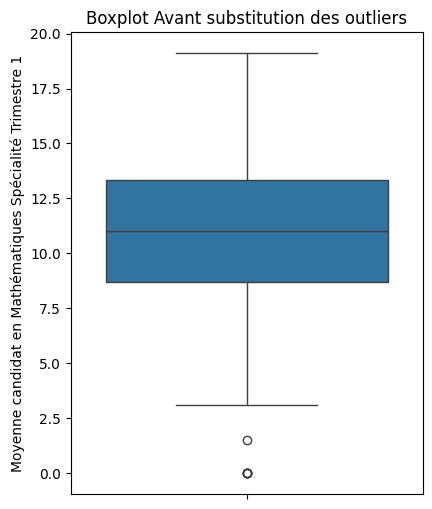

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
# boxplot d'une colonne avant de suppression d'outliers
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)  # Creating subplots
sns.boxplot(y=df['Moyenne candidat en Mathématiques Spécialité Trimestre 1'])
plt.title('Boxplot Avant substitution des outliers')

In [87]:
def bornes_iqr(dataframe, col_name, th1=0.25, th3=0.75): #pour les colonnes non normalement destribuées (methode IQR)
    quartile1 = dataframe[col_name].quantile(th1)
    quartile3 = dataframe[col_name].quantile(th3)
    iqr = quartile3 - quartile1
    borne_sup = quartile3 + 1.5 * iqr
    borne_inf = quartile1 - 1.5 * iqr
    return borne_inf, borne_sup



def bornes_std(dataframe, col_name): #pour les colonnes normalement destribuées (utiliser la moyenne et la variance)
    borne_sup = dataframe[col_name].mean() + 3 * dataframe[col_name].std()
    borne_inf = dataframe[col_name].mean() - 3 * dataframe[col_name].std()
    return borne_inf, borne_sup


#pour verifier si une colonne possède des outliers
def check_col_has_outliers(dataframe, col_name, iqr=True): #par defaut iqr, sinon std
    #obtention des valeurs des bornes selon le cas (paramètre iqr)
    if iqr:
      borne_inf, borne_sup = bornes_iqr(dataframe, col_name)
    else:
      borne_inf, borne_sup = bornes_std(dataframe, col_name)
    #verifier si il existe une valeur dans la dataframe en dehors de l'interval des bornes
    if dataframe[(dataframe[col_name] > borne_sup) | (dataframe[col_name] < borne_inf)].any(axis=None):
        return True
    else:
        return False

In [88]:
#remplacement des outliers par les bornes
def remplacer_avec_bornes(dataframe,cols, th1=0.25, th3=0.75, iqr=True):
    for col in cols:
          outliers_ = check_col_has_outliers(df,col)
          count = 0
          if iqr:
            borne_inf, borne_sup = bornes_iqr(dataframe, col, th1, th3)
          else:
            borne_inf, borne_sup = bornes_std(dataframe, col)
          if outliers_:
              count = dataframe[(dataframe[col] > borne_sup) | (dataframe[col] < borne_inf)][col].count()
              dataframe[col].where(dataframe[col] > borne_inf, borne_inf, inplace=True)
              dataframe[col].where(dataframe[col] < borne_sup, borne_sup, inplace=True)

In [89]:
#application de l'iqr (cas de colonnes non normalement destribuées)
remplacer_avec_bornes(df, iqr_cols, th1=0.25, th3=0.75, iqr=True)
print(df.describe())

       Méthode de travail  Capacité à s'investir  \
count          207.000000             207.000000   
mean             1.594203               1.826087   
std              1.136151               1.065202   
min              0.000000               0.000000   
25%              0.000000               1.000000   
50%              2.000000               2.000000   
75%              2.000000               3.000000   
max              3.000000               3.000000   

       Avis sur la capacité à réussir  Année scolaire   Autonomie  \
count                      207.000000      207.000000  207.000000   
mean                         1.888889        0.729469    1.763285   
std                          1.207671        0.445311    1.122153   
min                          0.000000        0.000000    0.000000   
25%                          1.000000        0.000000    1.000000   
50%                          2.000000        1.000000    2.000000   
75%                          3.000000        1.0

In [90]:
#remplacement dans le cas des colonnes normalement destribuées
remplacer_avec_bornes(df, std_cols, th1=0.25, th3=0.75, iqr=False)

Text(0.5, 1.0, 'Boxplot après substitution des outliers')

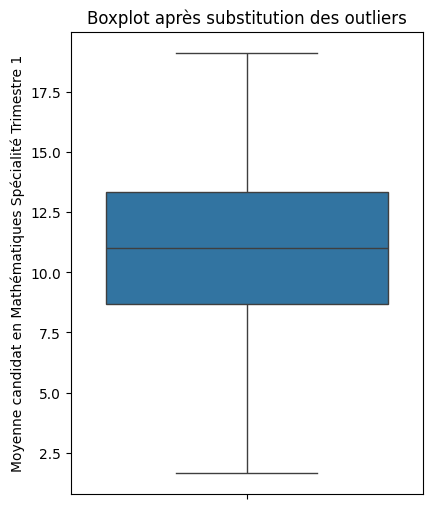

In [91]:
# boxplot de la meme colonne après la suppression des outliers
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)  # Creating subplots
sns.boxplot(y=df['Moyenne candidat en Mathématiques Spécialité Trimestre 1'])
plt.title('Boxplot après substitution des outliers')

# Normalization

Afin de mettre l'ensemble des données sur la même échelle, nous utilisons le **StandardScaler**, qui va standardiser les données en soustrayant la moyenne et en divisant par l'écart-type de chaque caractéristique. Cela permet d'éviter que les caractéristiques ayant des échelles différentes ne dominent indûment le modèle :

In [92]:
#enlever la colonne à predire "moyenne semestre"
y=df['Moyenne semestre']
X=df.drop(['Moyenne semestre'],axis=1)

print(y)

0      18.588
1      16.926
2      16.922
3      16.907
4      15.532
        ...  
202     0.909
203     0.000
204     2.213
205     0.000
206     0.000
Name: Moyenne semestre, Length: 207, dtype: float64


In [93]:
from sklearn import preprocessing

#normaliser les colonnes qu'on va utiliser lors de l'entrainement
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns)

Si la mise à l'échelle a été réussie, on devrait observer des moyennes proches de 0 et des écarts-types proches de 1 :

In [101]:
#calcul de la moyenne
mean_values = X_scaled.mean()

#calcul de l'ecart-type
std_values = X_scaled.std()

#affichage
print("Moyennes:")
print(mean_values)
print("\necart-types :")
print(std_values)

Moyennes:
Méthode de travail                                             -3.432574e-17
Capacité à s'investir                                           1.029772e-16
Avis sur la capacité à réussir                                  6.865147e-17
Année scolaire                                                 -2.059544e-16
Autonomie                                                      -3.432574e-17
Moyenne candidat en Physique-Chimie Spécialité Trimestre 2.1    6.865147e-17
Moyenne candidat en Mathématiques Expertes Trimestre 1         -1.029772e-16
Moyenne candidat en Mathématiques Spécialité Trimestre 2       -2.402802e-16
Moyenne candidat en Physique-Chimie Spécialité Trimestre 2      3.432574e-17
Moyenne candidat en Mathématiques Expertes Trimestre 2          2.402802e-16
Moyenne candidat en Mathématiques Spécialité Trimestre 2.1     -2.231173e-16
Moyenne candidat en Physique-Chimie Spécialité Trimestre 1.1    2.746059e-16
Moyenne candidat en Mathématiques Spécialité Trimestre 1        0.

# Pondération

Une fonction qui nous calcule la moyenne d'un candidat :

**Mathémariques :**
* pond_maths_p : ponderation de la moyenne de mathematiques de première pour le calcul de la moyenne generale
* pond_maths_t : ponderation de la moyenne de mathematiques de la terminale pour le calcul de la moyenne generale

**Physique :**
* pond_physique_p : ponderation de la matiere physique de la première pour le calcule de la moyenne generale du candidat
* pond_physique_t : ponderation de la matiere physique de la terminale pour le calcule de la moyenne generale du candidat

In [95]:
def calculer_moyenne(df, pond_maths_t, pond_physique_t, pond_maths_p, pond_physique_p):

  ## 1- moyenne terminale
    df['Moyenne maths terminale'] = (df[first_s_math[1]]+df[second_s_math[1]])/2
    df['Moyenne physique terminale']=(df[first_s_phsq[0]]+df[second_s_phsq[0]])/2
    df['Moyenne terminale'] = (pond_maths_t*df['Moyenne maths terminale'] + pond_physique_t*df['Moyenne physique terminale']) / (pond_maths_t + pond_physique_t)

  ## 2- moyene premiere
    df['Moyenne maths premiere']=(df[cols_math_premiere[0]]+df[cols_math_premiere[1]])/2
    df['Moyenne physique premiere']=(df[cols_phsq_premiere[0]]+df[cols_phsq_premiere[1]])/2
    df['Moyenne premiere']=(pond_maths_p*df['Moyenne maths premiere']+pond_physique_p*df['Moyenne physique premiere'])/(pond_maths_p+pond_physique_p)

  ## 3-renvoyer la moyenne des 2 années
    return df[['Moyenne premiere','Moyenne terminale']]

# Entrainement

On definit la classe du modele de regression lineaire personalisé, avec les ponderation comme parametres en plus, et les methodes de la classe modifiée :

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.metrics import r2_score

class LinearRegressorAvecPonderations(BaseEstimator):
    def __init__(self, pond_maths_t=3, pond_physique_t=1, pond_maths_p=4, pond_physique_p=1):
        self.pond_maths_t = pond_maths_t
        self.pond_physique_t = pond_physique_t
        self.pond_maths_p = pond_maths_p
        self.pond_physique_p = pond_physique_p
        self.model = None

    def fit(self, X, y):
        self.model = LinearRegression(fit_intercept=True)
        X_modifie=calculer_moyenne(X.copy(),self.pond_maths_t, self.pond_physique_t, self.pond_maths_p, self.pond_physique_p)
        X_modifie['Autonomie']=X['Autonomie']
        X_modifie['Méthode de travail']=X['Méthode de travail']
        X_modifie["Capacité à s'investir"]=X["Capacité à s'investir"]
        X_modifie["Avis sur la capacité à réussir"]=X["Avis sur la capacité à réussir"]
        self.model.fit(X_modifie, y)

    def predict(self, X):
        # Prédiction basée sur la moyenne pondérée et les appreciations
        X_modifie=calculer_moyenne(X.copy(),self.pond_maths_t, self.pond_physique_t, self.pond_maths_p, self.pond_physique_p)
        X_modifie['Autonomie']=X['Autonomie']
        X_modifie['Méthode de travail']=X['Méthode de travail']
        X_modifie["Capacité à s'investir"]=X["Capacité à s'investir"]
        X_modifie["Avis sur la capacité à réussir"]=X["Avis sur la capacité à réussir"]
        return self.model.predict(X_modifie)

    def score(self, X, y):
        predicted_y = self.predict(X)
        return r2_score(y, predicted_y)

    def get_params(self, deep=True):
        return {'pond_maths_t': self.pond_maths_t,'pond_physique_t':self.pond_physique_t,'pond_maths_p':self.pond_maths_p,'pond_physique_p':self.pond_physique_p}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

Grid Search pour la recherche des paramètres optimaux :

In [97]:
'''
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV, KFold


cv_generator = KFold(n_splits=5, shuffle=True, random_state=42)
# Définition des paramètres pour GridSearchCV
param_grid = {
    'pond_maths_t': [1, 2, 3, 4],
    'pond_physique_t': [1, 2, 3, 4],
    'pond_maths_p': [1, 2, 3, 4],
    'pond_physique_p': [1, 2, 3, 4],
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

# Initialisation de GridSearchCV avec KFold pour la validation croisée
grid_search_rf = GridSearchCV(LinearRegressorAvecPonderations(), param_grid, cv=cv_generator, scoring='neg_mean_squared_error')

# Exécution de GridSearchCV sur l'ensemble des données
grid_search_rf.fit(X_scaled, y)

# Affichage des meilleurs paramètres et du meilleur score MSE
print("Meilleurs paramètres:", grid_search_rf.best_params_)
print("Meilleur score (MSE):", -grid_search_rf.best_score_)
'''

'\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.model_selection import GridSearchCV, KFold\n\n\ncv_generator = KFold(n_splits=5, shuffle=True, random_state=42)\n# Définition des paramètres pour GridSearchCV\nparam_grid = {\n    \'pond_maths_t\': [1, 2, 3, 4],\n    \'pond_physique_t\': [1, 2, 3, 4],\n    \'pond_maths_p\': [1, 2, 3, 4],\n    \'pond_physique_p\': [1, 2, 3, 4],\n    \'fit_intercept\': [True, False],\n    \'normalize\': [True, False]\n}\n\n# Initialisation de GridSearchCV avec KFold pour la validation croisée\ngrid_search_rf = GridSearchCV(LinearRegressorAvecPonderations(), param_grid, cv=cv_generator, scoring=\'neg_mean_squared_error\')\n\n# Exécution de GridSearchCV sur l\'ensemble des données\ngrid_search_rf.fit(X_scaled, y)\n\n# Affichage des meilleurs paramètres et du meilleur score MSE\nprint("Meilleurs paramètres:", grid_search_rf.best_params_)\nprint("Meilleur score (MSE):", -grid_search_rf.best_score_)\n'

In [98]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

cv_generator = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(LinearRegressorAvecPonderations(), X_scaled, y, scoring='neg_mean_squared_error', cv=cv_generator)
print(abs(scores.mean()))

12.5085110621254


In [99]:
model = LinearRegressorAvecPonderations()
model.fit(X_scaled, y)
r_squared = model.score(X_scaled, y)
print(r_squared)

0.3389284229196151


Etude sur l'influence de la taille de l'echantillon sur la performance du modèle :

<ipython-input-100-aef656a2f3b0>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


(0.0, 40.0)

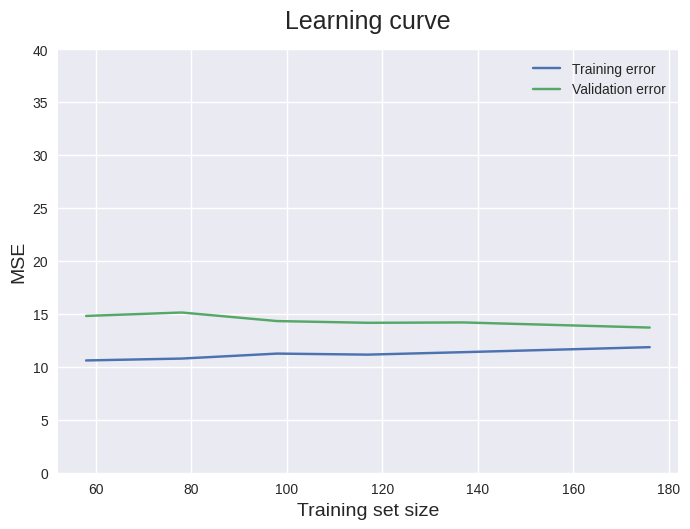

In [100]:

from sklearn.model_selection import learning_curve

train_sizes=[0.3, 0.4, 0.5, 0.6, 0.7, 0.9]

train_sizes, train_scores, validation_scores = learning_curve(estimator = model, X=X_scaled, y=y, train_sizes = train_sizes, cv = 20, scoring = 'neg_mean_squared_error', shuffle=True)

train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curve', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,40)

